# Problem statement


According to the Data Breach Index, more than 5 million records are being stolen on a daily basis. In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging. In this case study assignment, we construct a machine learning model from the dataset i.e."card_transdata" given by considering different Supervised Machine Learning Algorithms for calssification purpose i.e. K-Nearest Neighbors, Decision Tree Classifier, Random Forest Classifier. We then analyzed the performance of our model in terms of accuracy, confusion matrix


Import Libraries

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
plt.ticklabel_format(useOffset=False)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the Dataset

In [275]:
data = pd.read_csv("card_transdata.csv")

In [276]:
data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [277]:
data.tail(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


# Exploratory Data Analysis


In [152]:
data.shape

(1000000, 8)

In [153]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [154]:
data.columns.values

array(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'], dtype=object)

In [155]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [156]:
list(set(data.dtypes.tolist()))


[dtype('float64')]

Now to find out the unique values in each of the collumn, i will simple use a for loop

In [157]:
for column in data:
    print(data[column].unique())

[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]
[0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]
[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]


In [158]:
for column in data:
    print(f'{column}:{data[column].unique()}')

distance_from_home:[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]
distance_from_last_transaction:[0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]
ratio_to_median_purchase_price:[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]
repeat_retailer:[1. 0.]
used_chip:[1. 0.]
used_pin_number:[0. 1.]
online_order:[0. 1.]
fraud:[0. 1.]


In [159]:
data['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

In [160]:
#skewness and kurtosis
print("Skewness: %f" % data['fraud'].skew())
print("Kurtosis: %f" % data['fraud'].kurt())

Skewness: 2.921824
Kurtosis: 6.537067


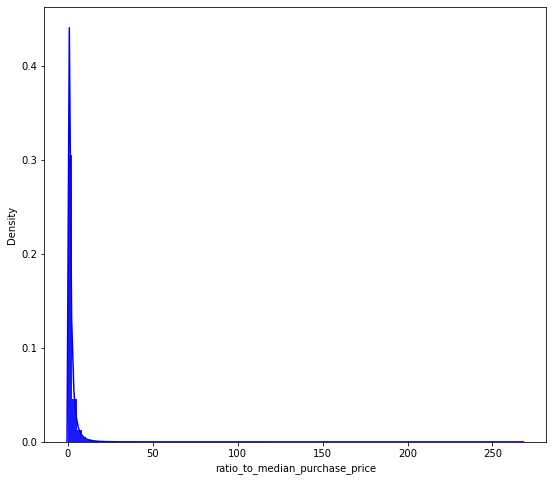

In [161]:
plt.figure(figsize=(9, 8))
sns.distplot(data['ratio_to_median_purchase_price'], color='b', bins=100, hist_kws={'alpha': 0.9});

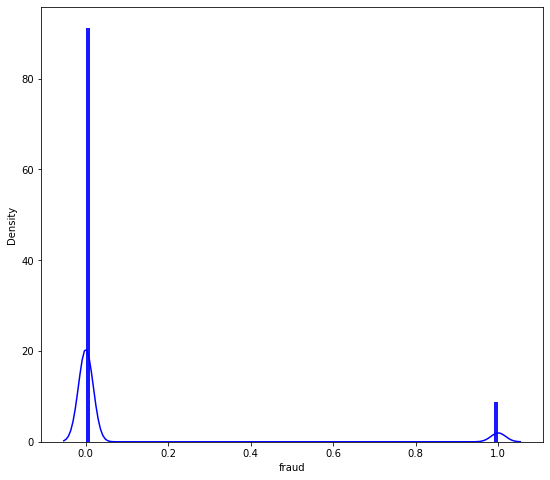

In [162]:
plt.figure(figsize=(9, 8))
sns.distplot(data['fraud'], color='b', bins=100, hist_kws={'alpha': 0.9});

In [163]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


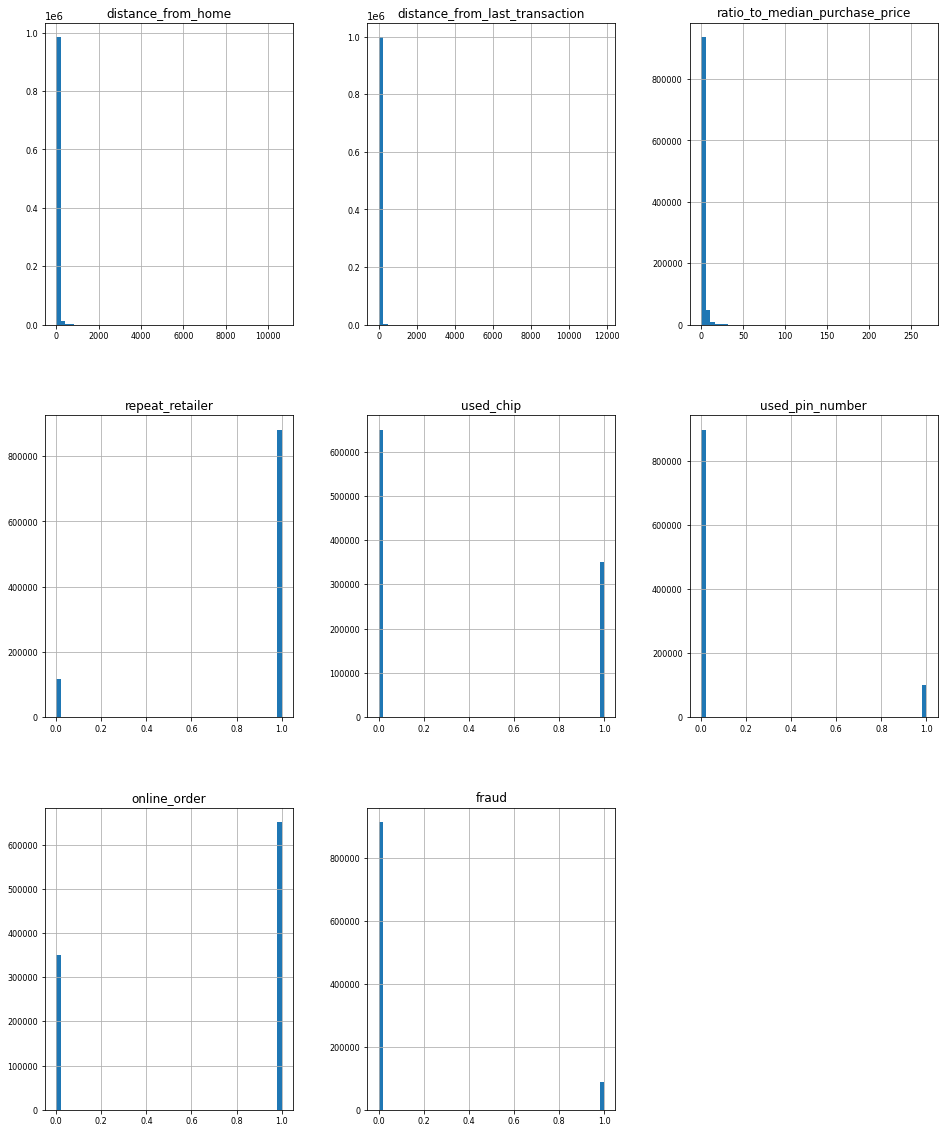

In [166]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [167]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<AxesSubplot:>

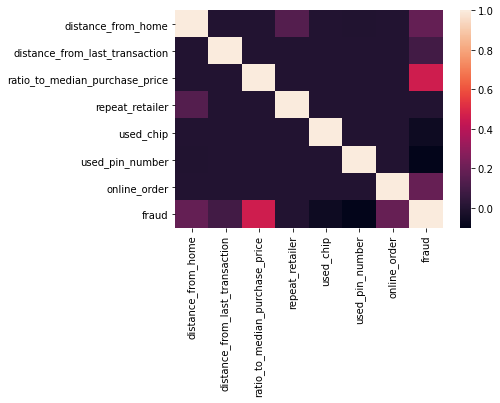

In [168]:
sns.heatmap(data.corr())

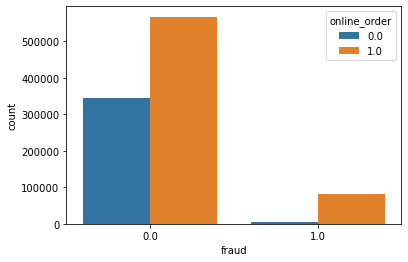

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='fraud', hue = "online_order" ,data = data)
plt.show()

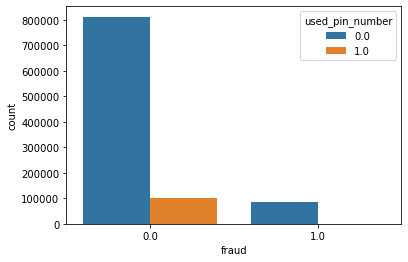

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='fraud', hue = "used_pin_number" ,data = data)
plt.show()

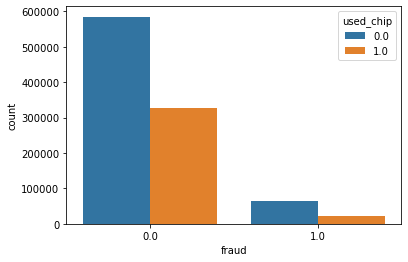

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='fraud', hue = "used_chip" ,data = data)
plt.show()

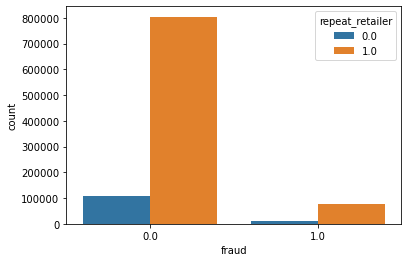

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='fraud', hue = "repeat_retailer" ,data = data)
plt.show()

<AxesSubplot:xlabel='fraud', ylabel='Density'>

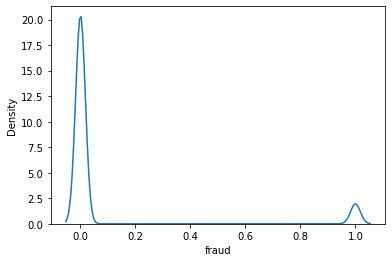

In [174]:
sns.kdeplot(data['fraud'])

<AxesSubplot:xlabel='distance_from_home', ylabel='Density'>

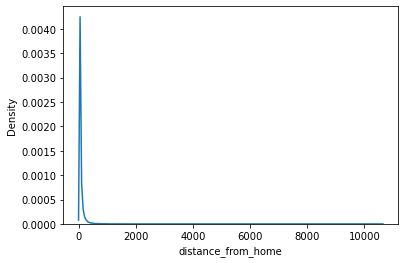

In [175]:
sns.kdeplot(data['distance_from_home'])

<AxesSubplot:xlabel='distance_from_last_transaction', ylabel='Density'>

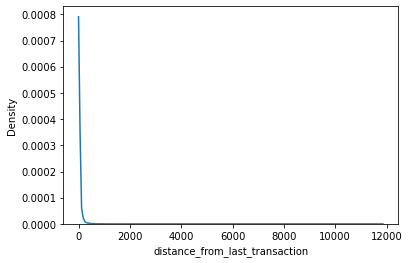

In [176]:
sns.kdeplot(data['distance_from_last_transaction'])

<AxesSubplot:xlabel='used_chip', ylabel='Density'>

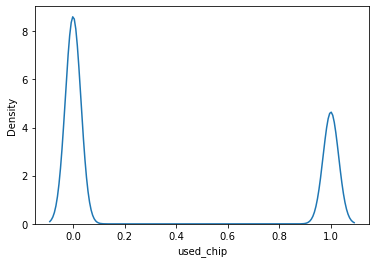

In [177]:
sns.kdeplot(data['used_chip'])

<AxesSubplot:xlabel='used_pin_number', ylabel='Density'>

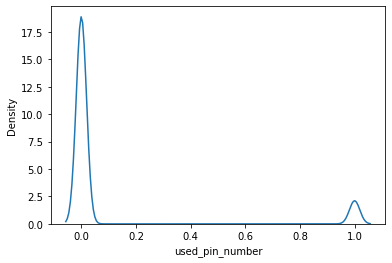

In [178]:
sns.kdeplot(data['used_pin_number'])

<AxesSubplot:xlabel='online_order', ylabel='Density'>

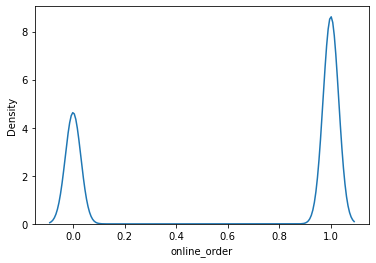

In [179]:
sns.kdeplot(data['online_order'])

<AxesSubplot:xlabel='distance_from_last_transaction', ylabel='fraud'>

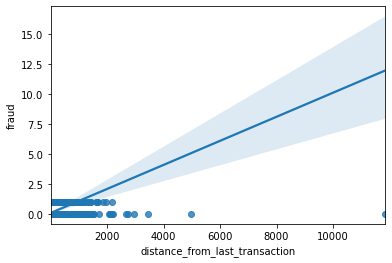

In [186]:
sns.regplot(x="distance_from_last_transaction", y="fraud", data=data)



<AxesSubplot:xlabel='distance_from_home', ylabel='fraud'>

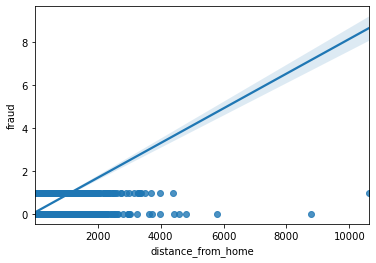

In [207]:
sns.regplot(x="distance_from_home", y="fraud", data=data)



In [ ]:
sns.regplot(x="ratio_to_median_purchase_price", y="fraud", data=data)




In [181]:
data['online_order'].value_counts()


1.0    650552
0.0    349448
Name: online_order, dtype: int64

In [182]:
data['online_order'].value_counts().to_frame()


,online_order
1.0,650552
0.0,349448


In [183]:
data['distance_from_home'].value_counts()


9.570304      1
6.900257      1
6.943063      1
7.038609      1
18.353774     1
             ..
26.424182     1
12.842369     1
3.786104      1
100.680293    1
1.969763      1
Name: distance_from_home, Length: 1000000, dtype: int64

In [184]:
data['distance_from_home'].value_counts().to_frame()


,distance_from_home
9.570304,1
6.900257,1
6.943063,1
7.038609,1
18.353774,1
...,...
26.424182,1
12.842369,1
3.786104,1
100.680293,1


In [185]:
data['distance_from_last_transaction'].value_counts()


0.022992      1
122.981697    1
0.435864      1
1.662242      1
0.287522      1
             ..
3.569070      1
15.868800     1
2.229245      1
0.816694      1
0.449071      1
Name: distance_from_last_transaction, Length: 1000000, dtype: int64

In [187]:
data['distance_from_last_transaction'].value_counts().to_frame()


,distance_from_last_transaction
0.022992,1
122.981697,1
0.435864,1
1.662242,1
0.287522,1
...,...
3.569070,1
15.868800,1
2.229245,1
0.816694,1


In [188]:
data['fraud'].value_counts()


0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [189]:
data['fraud'].value_counts().to_frame()


,fraud
0.0,912597
1.0,87403


In [190]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [191]:
data['used_chip'].unique()

array([1., 0.])

In [192]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [193]:
data_group_one = data[['used_chip','used_pin_number','fraud']]

In [194]:
data_group_one = data_group_one.groupby(['used_chip'], as_index = False).mean()

In [195]:
data_group_one

,used_chip,used_pin_number,fraud
0,0.0,0.100916,0.100051
1,1.0,0.100037,0.063956


In [196]:
data_group_one = data_group_one.groupby(['used_chip'], as_index = True).mean()

In [197]:
data_group_one

,used_pin_number,fraud
used_chip,,
0.0,0.100916,0.100051
1.0,0.100037,0.063956


In [198]:
data_group_one = data_group_one.groupby(['used_chip', 'used_pin_number'], as_index = True).mean()

In [199]:
data_group_one

,,fraud
used_chip,used_pin_number,
0.0,0.100916,0.100051
1.0,0.100037,0.063956


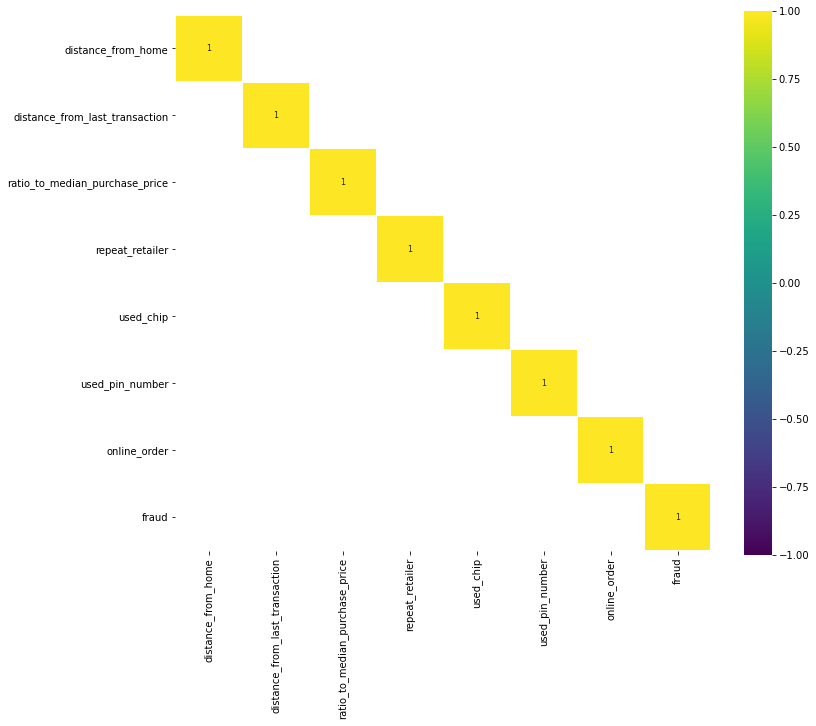

In [204]:
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Preprocess the data


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [205]:
data.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [206]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [314]:
data.drop_duplicates(inplace = True)

<AxesSubplot:>

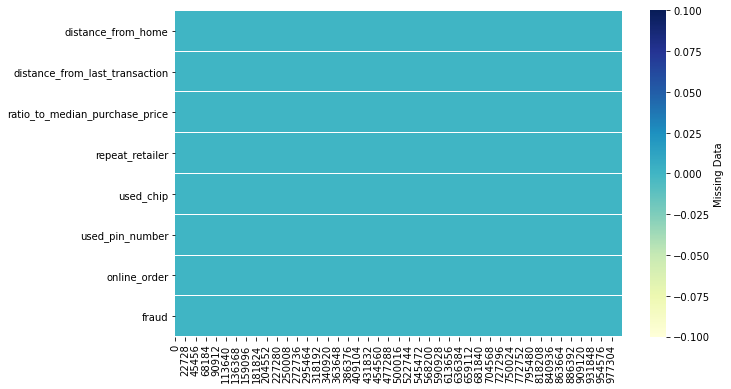

In [203]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# Train & Test Split

In [278]:
X = data.drop("fraud", axis =1)
y = data[["fraud"]]

In [279]:
X.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [280]:
y.head(5)

,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [282]:
X_train.shape

(800000, 7)

In [283]:
y_train.shape

(800000, 1)

In [284]:
X_test.shape

(200000, 7)

In [285]:
y_test.shape

(200000, 1)

# K- Nearest Neighbors Classifier

In [286]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')

In [287]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [288]:
y_pred = knn.predict(X_test)

In [289]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    182383
         1.0       0.95      0.88      0.91     17617

    accuracy                           0.99    200000
   macro avg       0.97      0.94      0.95    200000
weighted avg       0.98      0.99      0.98    200000



In [290]:
confusion_matrix(y_test, y_pred)

array([[181573,    810],
       [  2179,  15438]], dtype=int64)

In [295]:
cm1 = confusion_matrix(y_test, y_pred)

In [296]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Specificity :  0.8763126525515127


In [291]:
accuracy_score(y_test, y_pred)

0.985055

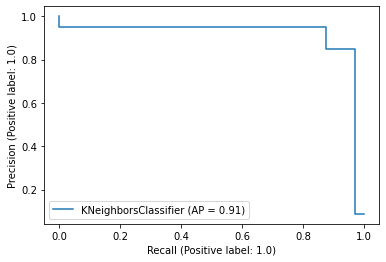

In [292]:
disp = plot_precision_recall_curve(knn, X_test, y_test)


# Decision Tree Classifier

In [233]:
data_model = DecisionTreeClassifier(random_state = 10)

In [243]:
data_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [244]:
data_model.score(X_train, y_train)

1.0

In [246]:
data_model.score(X_test, y_test)

0.99997

In [264]:
ypredi = data_model.predict(X_test)

In [248]:
data_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [249]:
y_pred = data_model.predict_proba(X_test)[:,1]

In [251]:
 new_y = []
for i in range (len(y_pred)):
        if y_pred[i]<0.6:
            new_y.append(0)
        else:
            new_y.append(1)

In [252]:
from sklearn.metrics import accuracy_score

In [253]:
accuracy_score(y_test, new_y)

0.99997

In [258]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    data_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    data_model.fit(X_train, y_train)
    train_accuracy.append(data_model.score(X_train, y_train))
    validation_accuracy.append(data_model.score(X_test, y_test))


In [259]:
frame = pd.DataFrame({'max_depth': range(1, 10), 'train_acc': train_accuracy, 'valid_acc': validation_accuracy})

In [260]:
plt.figure(figsize = (12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

No handles with labels found to put in legend.


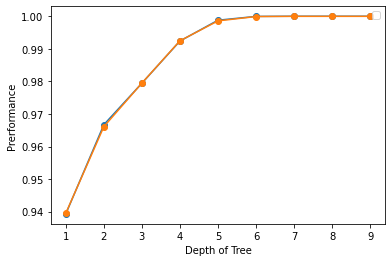

In [263]:
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker = 'o')
plt.xlabel('Depth of Tree')
plt.ylabel('Prerformance')
plt.legend()

In [265]:
print(classification_report(ypredi, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182387
         1.0       1.00      1.00      1.00     17613

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [266]:
confusion_matrix(y_test, ypredi)

array([[182382,      1],
       [     5,  17612]], dtype=int64)

In [267]:
accuracy_score(y_test, ypredi)

0.99997

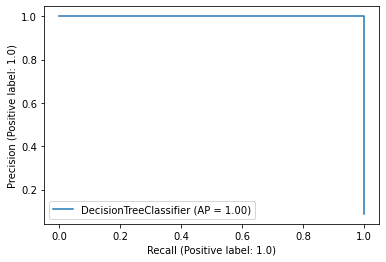

In [297]:
disp = plot_precision_recall_curve(data_model, X_test, y_test)


In [298]:
cm1 = confusion_matrix(y_test, ypredi)

In [299]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9997161832321053


# Random Forest Classifier

In [272]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)


Accuracy 100.0
              precision    recall  f1-score   support

         0.0   0.999984  1.000000  0.999992    182383
         1.0   1.000000  0.999830  0.999915     17617

    accuracy                       0.999985    200000
   macro avg   0.999992  0.999915  0.999953    200000
weighted avg   0.999985  0.999985  0.999985    200000



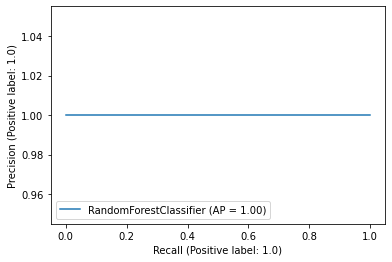

In [300]:
disp = plot_precision_recall_curve(random_forest, X_test, y_test)


In [303]:
confusion_matrix(y_test, Y_pred)

array([[182383,      0],
       [     3,  17614]], dtype=int64)

In [301]:
cm1 = confusion_matrix(y_test, Y_pred)

In [302]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9998297099392632


# To find the Features Critical in the Identification of Card Frauds.


We will use Feature Importance:
    Feature Importance gives us a score of each feature of our data, the higherthe score, the more important, the more relevant the feature is towards the output variable. We will be using Extra Tree Classifier and extract the top 5 features in the dataset

Import the Required Library

In [305]:
from sklearn.ensemble import ExtraTreesClassifier

In [306]:
model = ExtraTreesClassifier()

In [307]:
model.fit(X,y)

ExtraTreesClassifier()

In [310]:
print(model.feature_importances_)

[0.20167485 0.07190987 0.64451701 0.0033286  0.00826106 0.01522033
 0.05508827]


In [311]:
features_importances = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:>

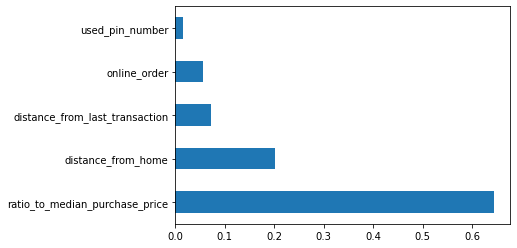

In [313]:
features_importances.nlargest(5).plot(kind = 'barh') 